# Housing Prices — Regressione lineare 

Notebook ristrutturato: EDA, preprocessing con pipeline, training, validazione incrociata e valutazione. Creato per essere leggibile e riusabile.

## 1. Import e configurazioni

In [11]:
# Librerie principali
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from pathlib import Path

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score,mean_squared_error

# Configurazioni grafiche generali
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 100

DATA_PATH = Path('../backend/data/housing.csv')
print('DATA PATH:', DATA_PATH.resolve())

DATA PATH: C:\Users\rigel\OneDrive\Desktop\python domestika\dataIA\California_Housing_Price\backend\data\housing.csv


## 2. Caricamento dati e panoramica (EDA)

In [9]:
# Carico il dataset
df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
display(df.head())

Shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# Informazioni generali e statistiche
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df[df["median_house_value"] <= 500000]
df = df[df["housing_median_age"] <= 50]
df = df[df["median_income"] <= 15]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

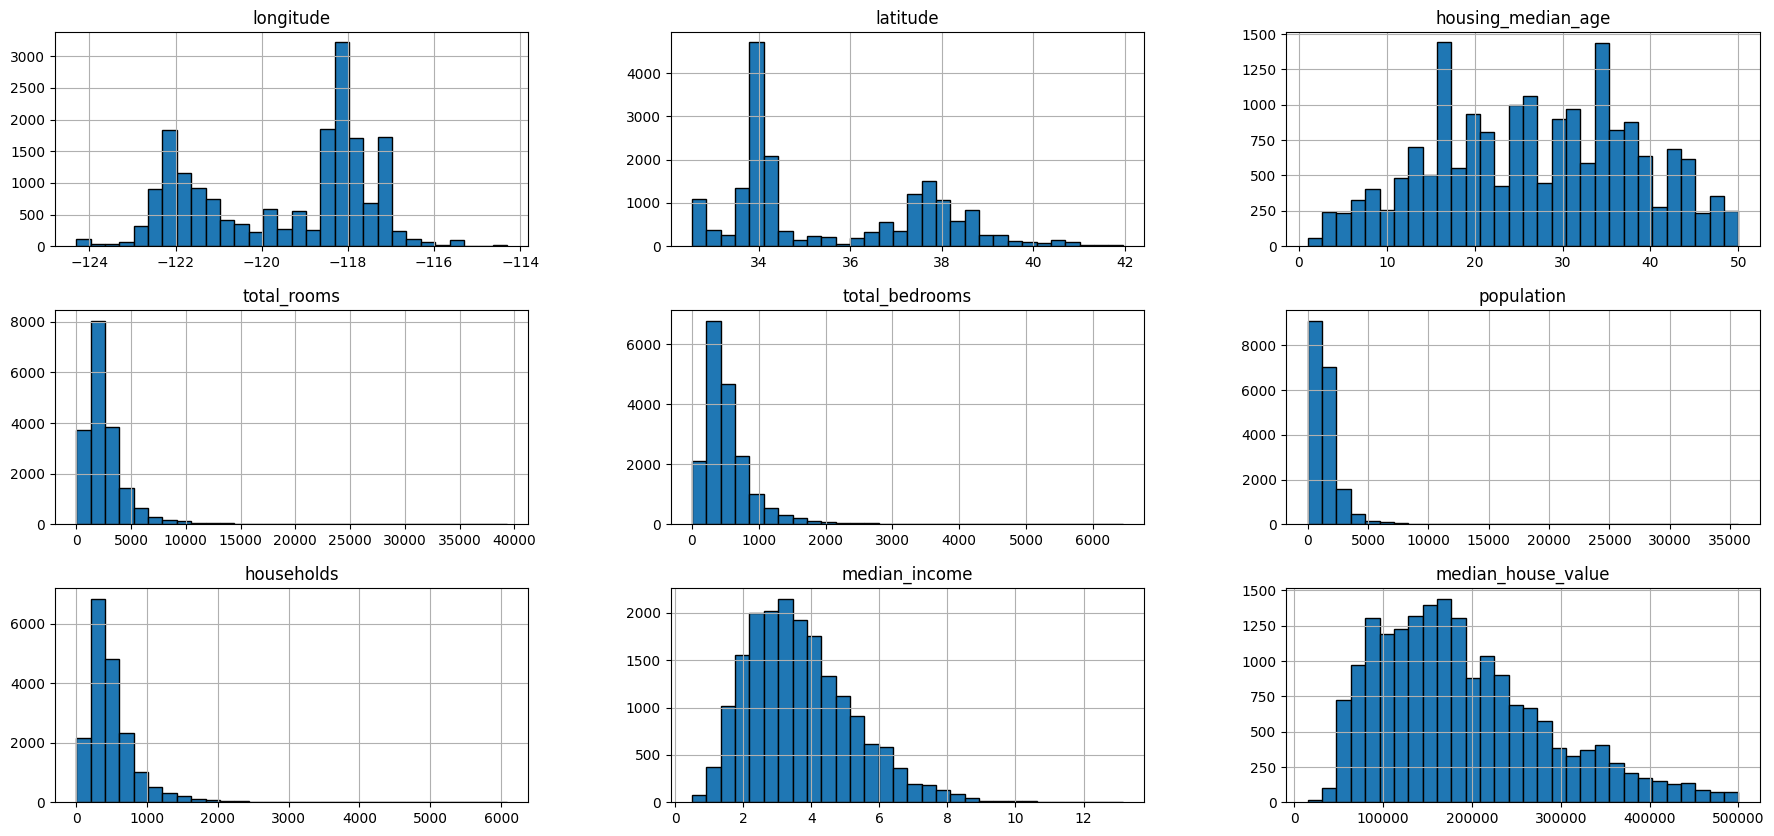

In [ ]:
df.hist(figsize=(22,10),bins=30,edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

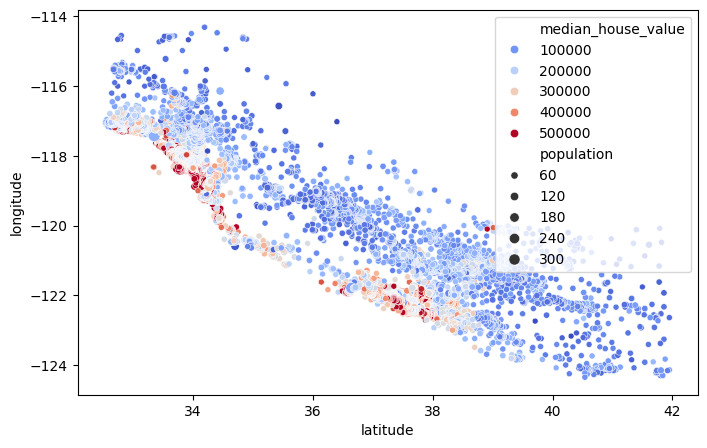

In [12]:
sb.scatterplot(x="latitude",y="longitude", data=df,hue='median_house_value',palette="coolwarm",size=df["population"]/100 )


<Axes: xlabel='latitude', ylabel='longitude'>

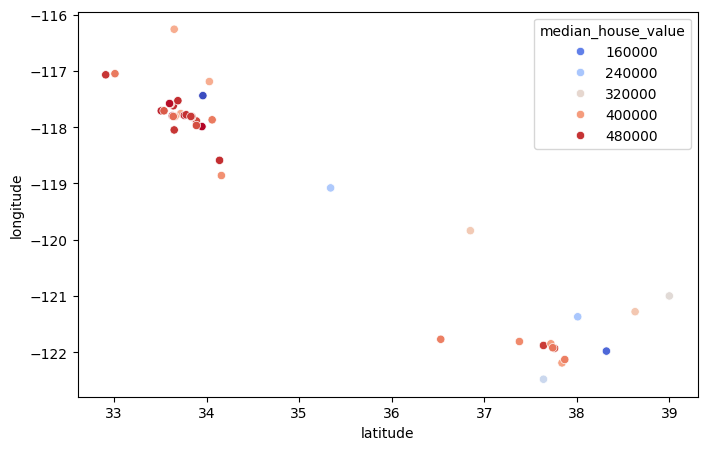

In [ ]:
sb.scatterplot(x="latitude",y="longitude", data=df[(df.median_income>10)] ,hue='median_house_value',palette="coolwarm" )

Missing per colonna:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        192
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


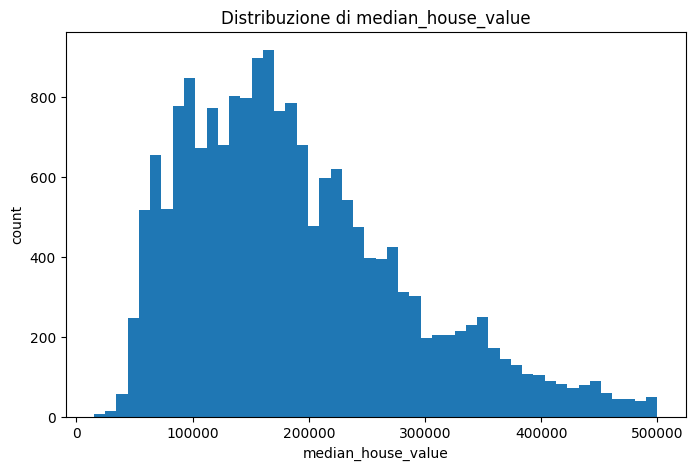

In [15]:
# Controllo valori mancanti e distribuzione della variabile target
print('Missing per colonna:\n', df.isnull().sum())
plt.figure()
plt.hist(df['median_house_value'], bins=50)
plt.title('Distribuzione di median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('count')
plt.show()

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        192
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [ ]:
# Distribuzione categorica: ocean_proximity (se presente)
if 'ocean_proximity' in df.columns:
    print(df['ocean_proximity'].value_counts())
else:
    print('Colonna ocean_proximity non presente.')

ocean_proximity
<1H OCEAN     8317
INLAND        6331
NEAR OCEAN    2322
NEAR BAY      1554
ISLAND           2
Name: count, dtype: int64


# FEATURE ENGINEERING

In [ ]:
X_cluster = df[['latitude', 'longitude', 'median_income']].copy()

randomState = 42
kmeans = KMeans(n_clusters=6, random_state=randomState)
cluster = kmeans.fit_predict(X_cluster)

In [ ]:
# Nuove features da creare:
df["region_cluster"]=X_cluster['region_cluster'] = cluster

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'] 
df['population_density'] = df['population'] / df['households']
df['income_per_room'] = df['median_income'] / df['total_rooms']



Text(0.5, 1.0, 'Cluster geografici del dataset Housing')

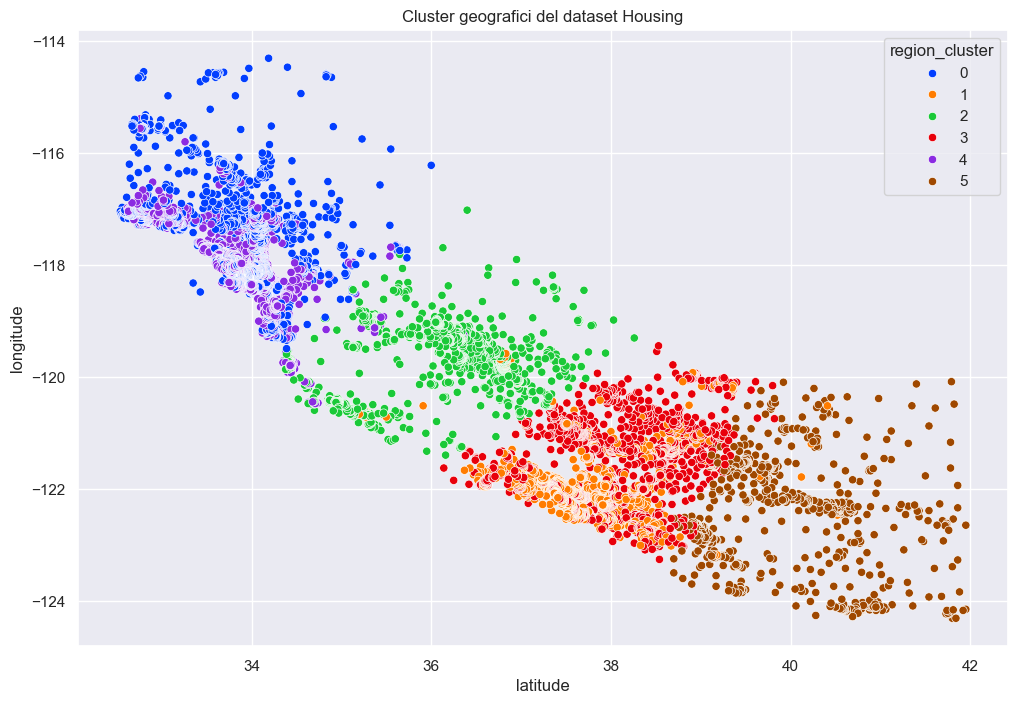

In [ ]:
sb.set_theme(rc={'figure.figsize':(12,8)})
sb.scatterplot(x="latitude",y="longitude", data=X_cluster ,hue="region_cluster",palette="bright" )
plt.title("Cluster geografici del dataset Housing")

In [ ]:
X_cluster["region_cluster"].value_counts()

region_cluster
0    6722
3    3670
4    3468
1    2243
2    1594
5     829
Name: count, dtype: int64

In [ ]:
# Calcolo della media del reddito per cluster
med_clus = X_cluster.groupby(["region_cluster"])['median_income'].mean()

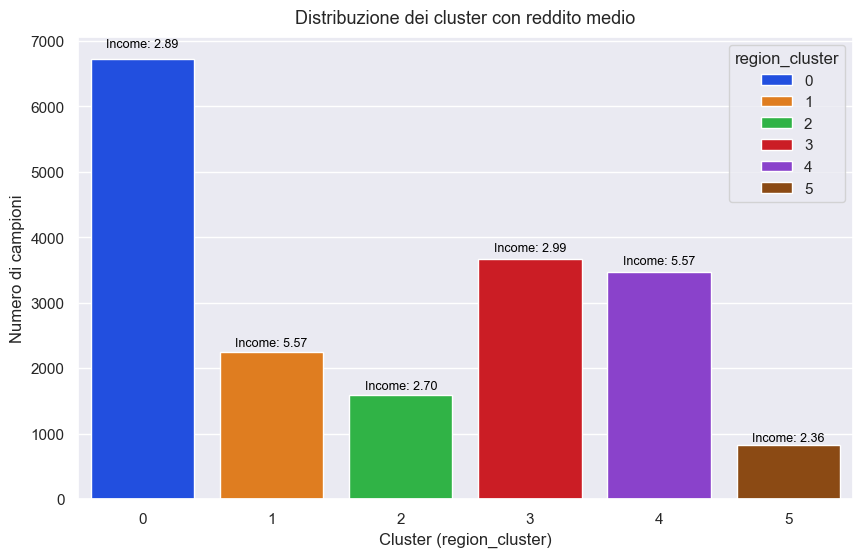

In [ ]:
# Ordine e palette coerenti
order = sorted(df['region_cluster'].unique())
palette = sb.color_palette("bright", len(order))

# --- CREA IL COUNTPLOT ---
plt.figure(figsize=(10,6))
ax = sb.countplot(x="region_cluster", data=df, hue="region_cluster",palette=palette, order=order)

# --- AGGIUNGI ETICHETTE SOPRA OGNI BARRA ---
for i, cluster in enumerate(order):
    # Altezza della barra
    count = df[df['region_cluster'] == cluster].shape[0]
    # Media del reddito corrispondente
    income = med_clus[cluster]
    # Posizione dell’etichetta (centrata sopra la barra)
    ax.text(
        i, count + (count * 0.02),  # posizione (x,y)
        f"Income: {income:.2f}",    # testo mostrato
        ha='center', va='bottom', fontsize=9, color='black'
    )

# --- STILE GRAFICO ---
plt.title("Distribuzione dei cluster con reddito medio", fontsize=13, pad=10)
plt.xlabel("Cluster (region_cluster)")
plt.ylabel("Numero di campioni")
plt.show()

In [ ]:
df_nan = df.copy()
df_nan = df_nan.dropna()
dummies = pd.get_dummies(df_nan["ocean_proximity"],dtype=int)
df_nan = df_nan.join(dummies)
df_nan = df_nan.drop(['ocean_proximity'],axis=1)

<Axes: >

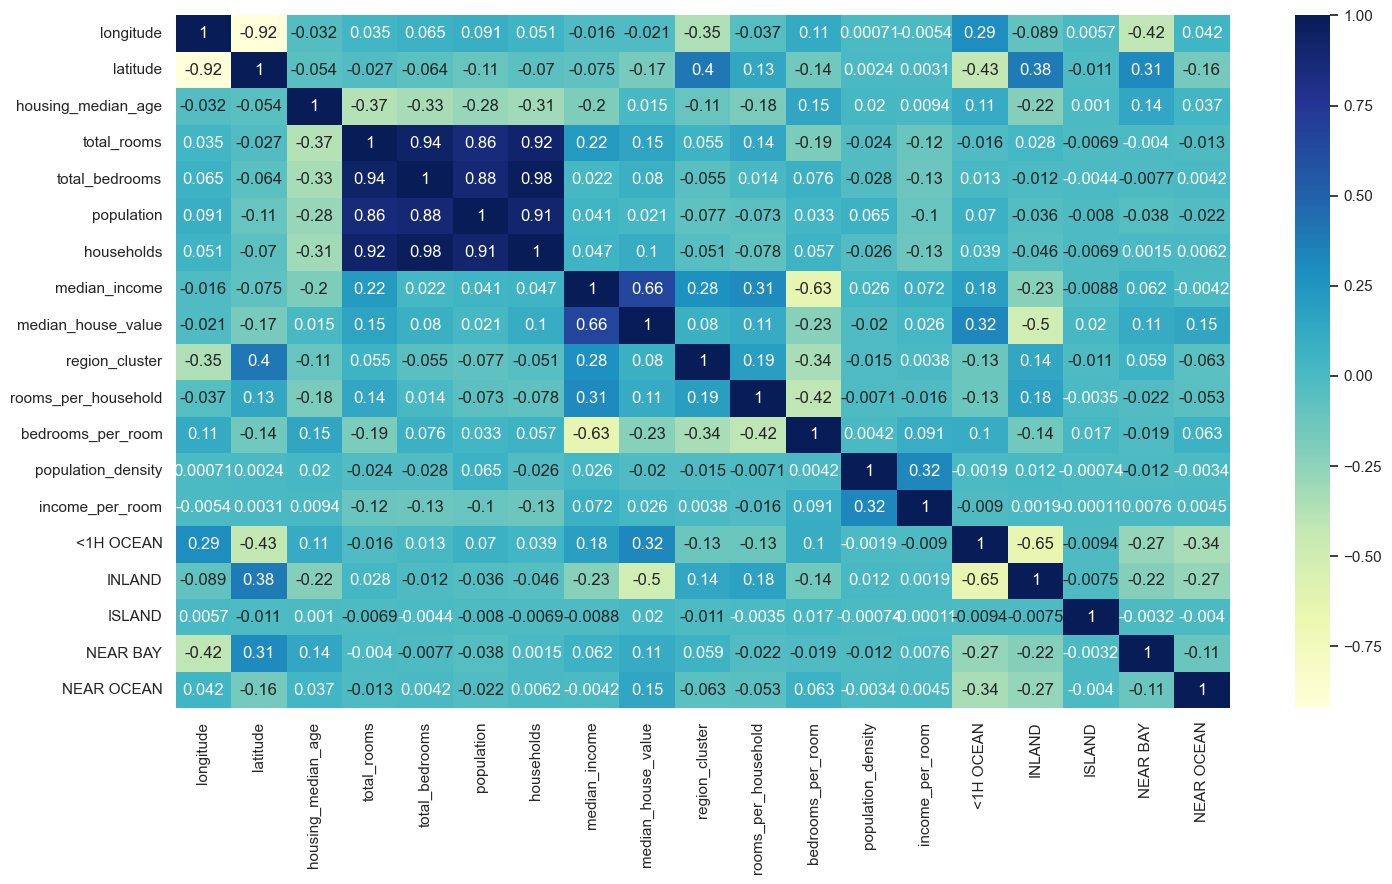

In [ ]:
sb.set_theme(rc={'figure.figsize':(17,9)})
sb.heatmap(df_nan.corr(), annot=True , cmap="YlGnBu")

## 3. Preprocessing e pipeline

Costruisco una `ColumnTransformer` che:

- imputa valori mancanti
- scala le caratteristiche numeriche
- codifica le categoriche con OneHotEncoder

Questo viene incapsulato in una `Pipeline` con il modello.

In [ ]:
# Separiamo feature e target
TARGET = 'median_house_value'
if TARGET not in df.columns:
    raise ValueError(f'Target column {TARGET} non trovata nel dataset.')
X = df_nan.drop(columns=[TARGET])
y = df_nan[TARGET].copy()

# Identifichiamo colonne numeriche e categoriche
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print('Numerical cols:', num_cols)
print('Categorical cols:', cat_cols)

Numerical cols: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_density', 'income_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
Categorical cols: []


In [ ]:
# Definizione trasformatori
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [ ]:
# Pipeline completa con modello
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (14667, 18) Test shape: (3667, 18)


## 4. Training e validazione incrociata

In [ ]:
# Training semplice
model.fit(X_train, y_train)
print('Training completato.')

Training completato.


In [ ]:
# Cross-validation (KFold) su training set per valutare stabilità
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
print('CV R2 scores:', cv_scores)
print('CV R2 mean: {:.4f} ± {:.4f}'.format(cv_scores.mean(), cv_scores.std()))

CV R2 scores: [0.64149297 0.62928277 0.62340341 0.6366279  0.64047505]
CV R2 mean: 0.6343 ± 0.0069


## 5. Valutazione sul test set

Calcolo R², MAE ,MSE e RMSE; mostro un plot dei valori reali vs predetti.

In [ ]:
# Previsioni e metriche
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score_train = model.score(X_train,y_train)

In [ ]:
data = { "test type" : ["R2/Score Test","MAE","MSE","RMSE","Score Train"] , 
        "value" : [r2,mae,mse,rmse,score_train]
        }
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame(data)

,test type,value
0,R2/Score Test,0.61
1,MAE,42904.39
2,MSE,3573277887.00
3,RMSE,59776.90
4,Score Train,0.64


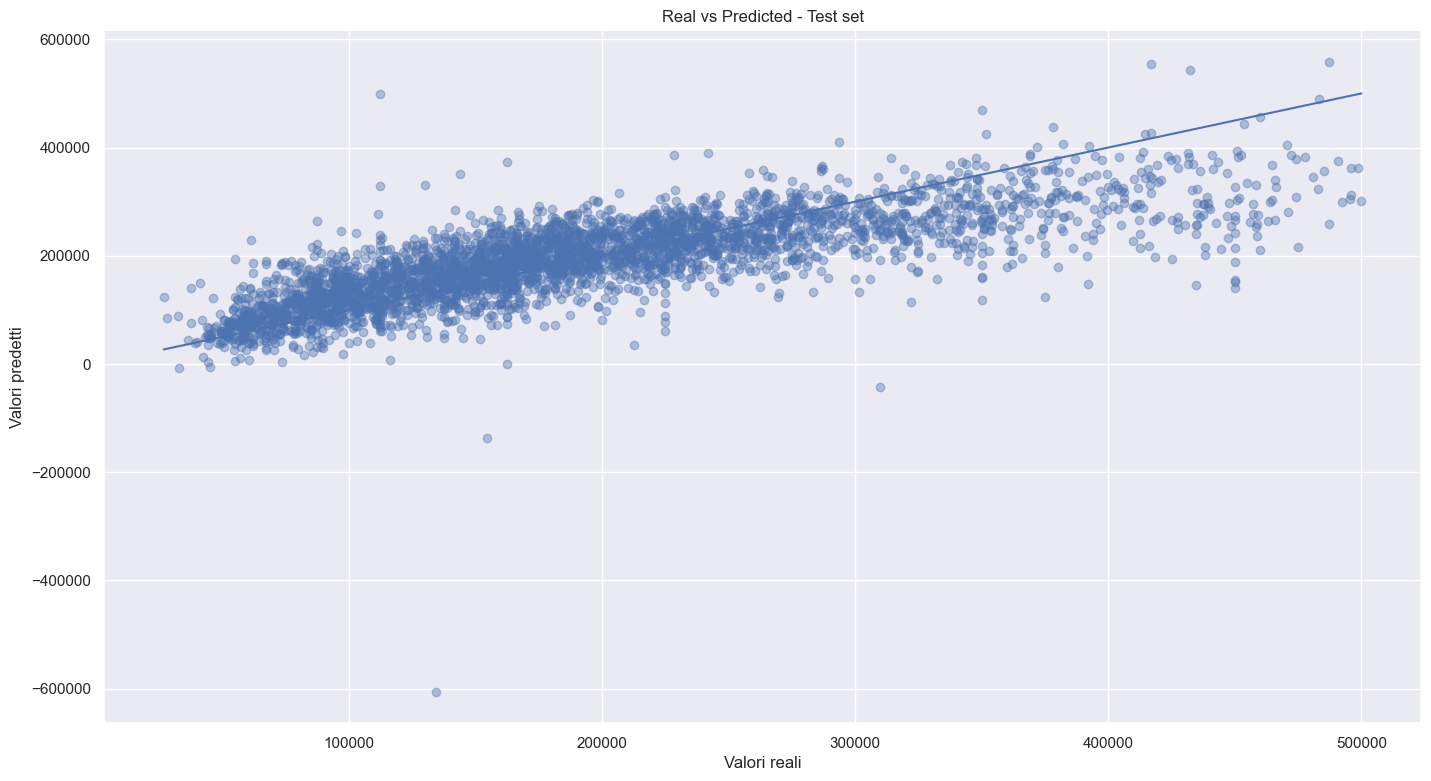

In [ ]:
# Plot valori reali vs predetti
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Valori reali')
plt.ylabel('Valori predetti')
plt.title('Real vs Predicted - Test set')
plt.show()

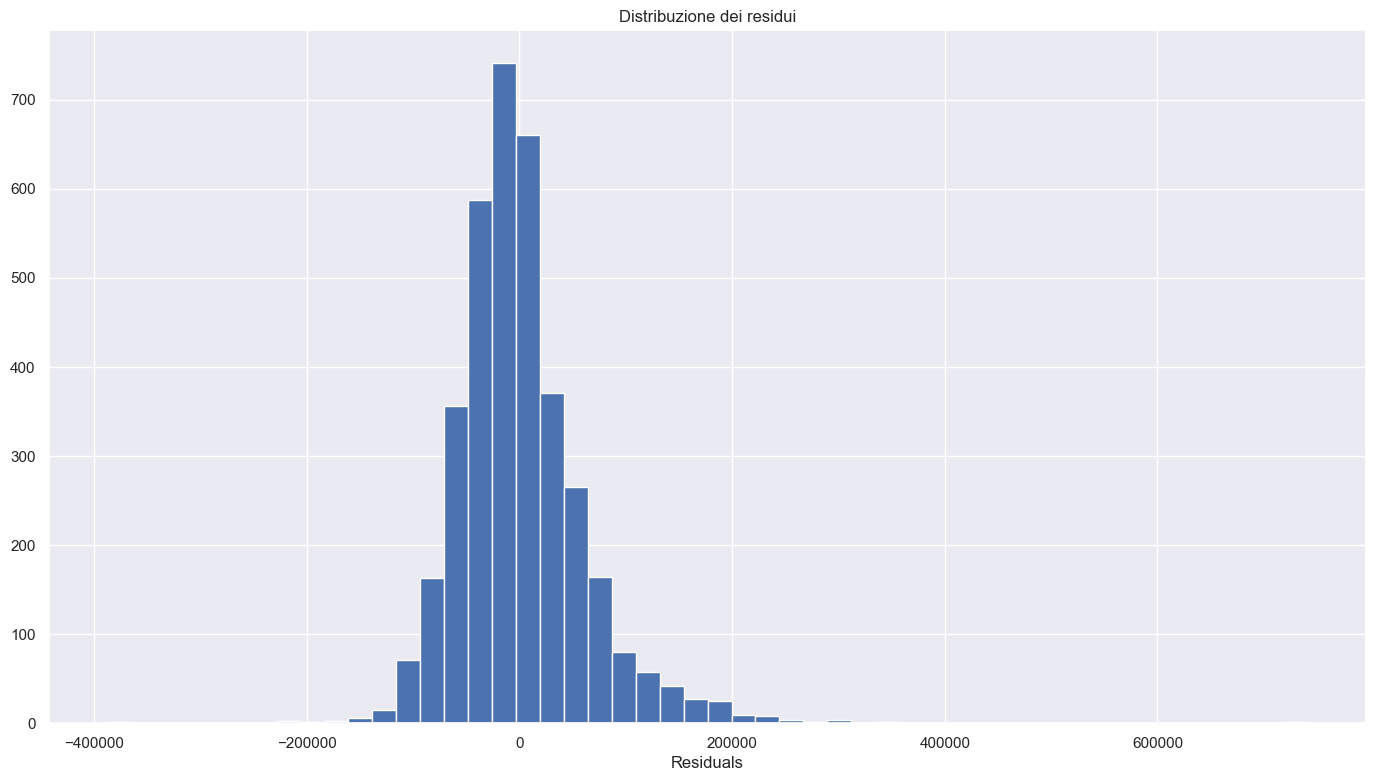

In [ ]:
# Residuals plot
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=50)
plt.title('Distribuzione dei residui')
plt.xlabel('Residuals')
plt.show()

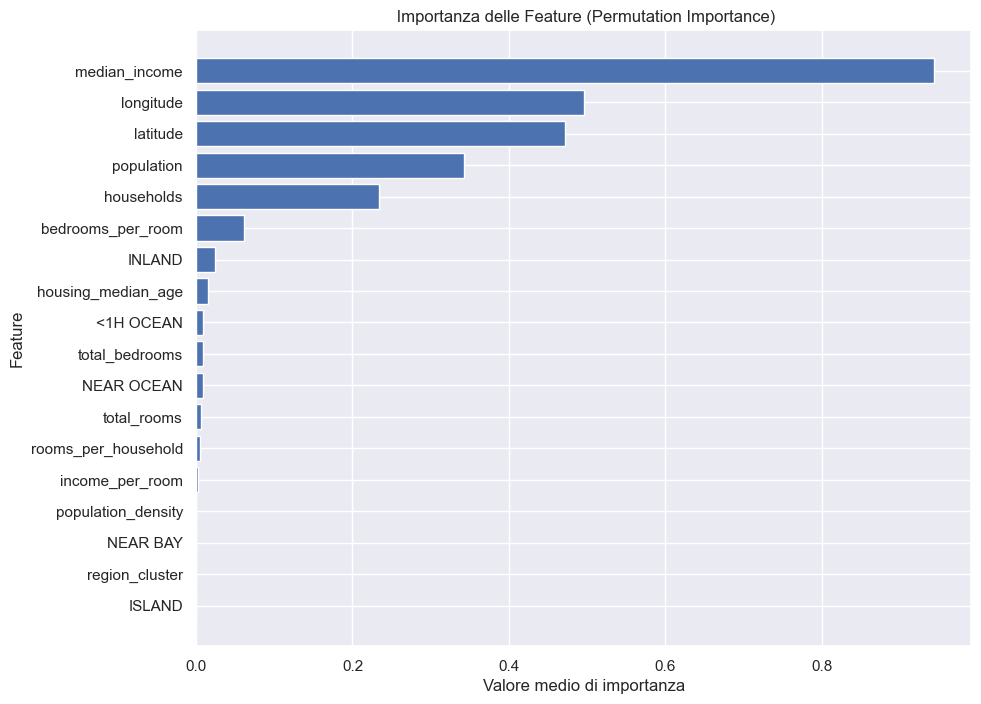

,Feature,Importance
15,ISLAND,0.00
8,region_cluster,0.00
16,NEAR BAY,0.00
11,population_density,0.00
12,income_per_room,0.00
9,rooms_per_household,0.00
3,total_rooms,0.01
17,NEAR OCEAN,0.01
4,total_bedrooms,0.01
13,<1H OCEAN,0.01


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)


plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.title(' Importanza delle Feature (Permutation Importance)')
plt.xlabel('Valore medio di importanza')
plt.ylabel('Feature')
plt.show()

importances.head(23)

In [ ]:
important_features = importances[importances['Importance'] > 0.001]['Feature']
X_reduced = X[important_features]

X_reduced

,income_per_room,rooms_per_household,total_rooms,NEAR OCEAN,total_bedrooms,<1H OCEAN,housing_median_age,INLAND,bedrooms_per_room,households,population,latitude,longitude,median_income
0,0.01,6.98,880.00,0,129.00,0,41.00,0,0.15,126.00,322.00,37.88,-122.23,8.33
1,0.00,6.24,7099.00,0,1106.00,0,21.00,0,0.16,1138.00,2401.00,37.86,-122.22,8.30
8,0.00,4.29,2555.00,0,665.00,0,42.00,0,0.26,595.00,1206.00,37.84,-122.26,2.08
15,0.00,4.24,1120.00,0,283.00,0,50.00,0,0.25,264.00,697.00,37.85,-122.26,2.12
18,0.00,5.34,2239.00,0,455.00,0,50.00,0,0.20,419.00,990.00,37.84,-122.26,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.00,5.05,1665.00,0,374.00,0,25.00,1,0.22,330.00,845.00,39.48,-121.09,1.56
20636,0.00,6.11,697.00,0,150.00,0,18.00,1,0.22,114.00,356.00,39.49,-121.21,2.56
20637,0.00,5.21,2254.00,0,485.00,0,17.00,1,0.22,433.00,1007.00,39.43,-121.22,1.70
20638,0.00,5.33,1860.00,0,409.00,0,18.00,1,0.22,349.00,741.00,39.43,-121.32,1.87


## RFE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Applica solo preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Esegui RFE
linreg = LinearRegression()
rfe = RFE(estimator=linreg, n_features_to_select=11)
rfe.fit(X_train_transformed, y_train)

# Ottieni nomi delle feature
num_features = list(num_cols)   # o semplicemente num_cols se è già lista
cat_features = []

if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(cat_cols).tolist()

all_features = num_features + cat_features
selected_features = np.array(all_features)[rfe.support_]
print("✅ Feature selezionate da RFE:")
for f in selected_features:
    print("-", f)



✅ Feature selezionate da RFE:
- longitude
- latitude
- housing_median_age
- total_bedrooms
- population
- households
- median_income
- bedrooms_per_room
- <1H OCEAN
- INLAND
- NEAR OCEAN


In [ ]:
# Dati ridotti
X_train_reduced = X_train_transformed[:, rfe.support_]
X_test_reduced  = X_test_transformed[:, rfe.support_]

# Addestra modello ridotto
linreg.fit(X_train_reduced, y_train)
y_pred_reduced = linreg.predict(X_test_reduced)

r2_rfe = r2_score(y_test, y_pred_reduced)
mae_rfe = mean_absolute_error(y_test, y_pred_reduced)
mse_rfe = mean_squared_error(y_test,y_pred)
rmse_rfe = mean_squared_error(y_test, y_pred_reduced)
score_train_rfe = linreg.score(X_train_reduced,y_train)


print("📉 Prestazioni modello RFE:")
print(f"R²: {r2_rfe:.4f}")
print(f"MAE: {mae_rfe:.2f}")
print(f"RMSE: {rmse_rfe:.2f}")

data = { "test type" : ["R2/Score Test","MAE","MSE","RMSE","Score Train"] , 
        "value" : [r2_rfe,mae_rfe,mse_rfe,rmse_rfe,score_train_rfe]
        }
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame(data)

📉 Prestazioni modello RFE:
R²: 0.6043
MAE: 43072.79
RMSE: 3600492313.56


,test type,value
0,R2/Score Test,0.60
1,MAE,43072.79
2,MSE,3573277887.00
3,RMSE,3600492313.56
4,Score Train,0.64


In [ ]:
spread_score = score_train_rfe - r2_rfe

if spread_score > 0.10:
    print(f'⚠️ OVERFITTING ( {spread_score:.2f})')

elif spread_score <= -0.05:
    print(f'🧊 UNDERFITTING ( {spread_score:.2f})')

elif score_train_rfe > 0.95 and r2_rfe > 0.95:
    print('🚨 DATA LEAKAGE')

else:
    print(f'✅ MODEL BALANCED ( {spread_score:.2f})')


✅ MODEL BALANCED ( 0.03)


 MODEL BALANCED 0.03


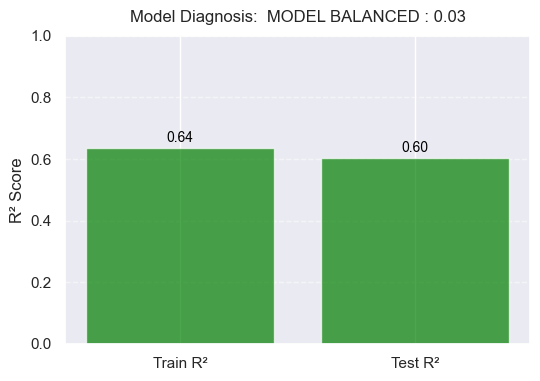

In [ ]:
# Calcolo della differenza
spread_score = score_train_rfe - r2_rfe

# Diagnosi automatica
if spread_score > 0.10:
    status = " OVERFITTING"
    color = "red"
elif spread_score <= -0.05:
    status = " UNDERFITTING"
    color = "blue"
elif score_train_rfe > 0.95 and r2_rfe > 0.95:
    status = " POSSIBLE DATA LEAKAGE"
    color = "orange"
else:
    status = " MODEL BALANCED"
    color = "green"

print(f"{status} {spread_score:.2f}")

# --- GRAFICO ---

plt.figure(figsize=(6,4))
plt.bar(["Train R²", "Test R²"], [score_train_rfe, r2_rfe], color=[color, color], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title(f"Model Diagnosis: {status} : {spread_score:.2f}", fontsize=12, pad=10)
plt.text(0, score_train_rfe + 0.02, f"{score_train_rfe:.2f}", ha='center', color='black', fontsize=10)
plt.text(1, r2_rfe + 0.02, f"{r2_rfe:.2f}", ha='center', color='black', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 6. Interpretazione semplice: coefficienti del modello lineare

Se il modello è `LinearRegression`, possiamo provare a ricostruire i nomi delle feature dopo OneHotEncoder e mostrare i coefficienti (attenzione: feature scaling applicato).

In [ ]:
# Estraiamo i nomi delle feature trasformate e i coefficienti (se possibile)
reg = model.named_steps['regressor']
pre = model.named_steps['preprocessor']

# Costruiamo i nomi feature per numeriche
num_features = num_cols

# Per le categoricali, ricaviamo nomi da OneHotEncoder se presente
cat_features = []
if cat_cols:
    # recuperiamo l'onehot encoder dal preprocessor
    ohe = pre.named_transformers_['cat'].named_steps['onehot']
    try:
        ohe_feat_names = ohe.get_feature_names_out(cat_cols).tolist()
    except Exception:
        # sklearn più vecchio
        ohe_feat_names = ohe.get_feature_names(cat_cols).tolist()
    cat_features = ohe_feat_names

feature_names = num_features + cat_features
coefs = reg.coef_ if hasattr(reg, 'coef_') else None

if coefs is not None and len(coefs) == len(feature_names):
    feat_imp = pd.DataFrame({'feature': feature_names, 'coef': coefs})
    feat_imp['abs_coef'] = feat_imp['coef'].abs()
    feat_imp = feat_imp.sort_values('abs_coef', ascending=False).head(20)
    display(feat_imp)
else:
    print('Impossibile estrarre coefficienti (dimensioni non concordano o modello non lineare).')

,feature,coef,abs_coef
7,median_income,65415.66,65415.66
0,longitude,-47493.11,47493.11
1,latitude,-46965.50,46965.50
5,population,-41735.57,41735.57
6,households,34260.74,34260.74
9,bedrooms_per_room,16685.85,16685.85
13,INLAND,-10281.53,10281.53
2,housing_median_age,8795.66,8795.66
12,<1H OCEAN,6399.47,6399.47
4,total_bedrooms,6267.80,6267.80


## 7. (Opzionale) Salvataggio della pipeline

Se desideri, possiamo salvare la pipeline `model` su disco con `joblib`.

## 8. Conclusioni e possibili miglioramenti

- Valutare modelli più complessi (RandomForest, XGBoost) e confrontare con CV.
- Effettuare feature engineering (ad esempio trasformazioni spaziali, aggregazioni per quartiere).
- Usare GridSearch/RandomizedSearch per iperparametri.

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,region_cluster,rooms_per_household,bedrooms_per_room,population_density,income_per_room
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,1,6.98,0.15,2.56,0.01
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,1,6.24,0.16,2.11,0.00
8,-122.26,37.84,42.00,2555.00,665.00,1206.00,595.00,2.08,226700.00,NEAR BAY,3,4.29,0.26,2.03,0.00
15,-122.26,37.85,50.00,1120.00,283.00,697.00,264.00,2.12,140000.00,NEAR BAY,3,4.24,0.25,2.64,0.00
18,-122.26,37.84,50.00,2239.00,455.00,990.00,419.00,1.99,158700.00,NEAR BAY,3,5.34,0.20,2.36,0.00


In [ ]:
# Esempio di nuova casa (devi usare le stesse colonne del dataset originale)
nuova_casa = pd.DataFrame({
    'longitude': [-122.2],
    'latitude': [37.8],
    'housing_median_age': [5],
    'total_rooms': [5],
    'total_bedrooms': [2],
    'population': [1200],
    'households': [400],
    'median_income': [6.5],
    'ocean_proximity': ['<1H OCEAN'],
    'bedrooms_per_room':[30],
    'population_density':[300],
    'income_per_room':[44],
    'rooms_per_household':[45],
    'NEAR BAY':[1],
    '<1H OCEAN':[0],
    'INLAND':[0],
    'NEAR OCEAN':[0],
    'ISLAND':[0],
})

# Predizione
predizione = model.predict(nuova_casa)
print(f"Valore stimato della casa: {predizione[0]:.2f}")


Valore stimato della casa: 3225709.01
